In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = pd.read_csv("C:/Users/VIVOBOOK/Desktop/Python/TITANIC/titanic/train.csv")
test = pd.read_csv("C:/Users/VIVOBOOK/Desktop/Python/TITANIC/titanic/test.csv")

In [8]:
print("TRAIN\n")
for col in train.columns:
    print(f"Number of unique values in the column {col} = {train[col].nunique()}")

TRAIN

Number of unique values in the column PassengerId = 891
Number of unique values in the column Survived = 2
Number of unique values in the column Pclass = 3
Number of unique values in the column Name = 891
Number of unique values in the column Sex = 2
Number of unique values in the column Age = 88
Number of unique values in the column SibSp = 7
Number of unique values in the column Parch = 7
Number of unique values in the column Ticket = 681
Number of unique values in the column Fare = 248
Number of unique values in the column Cabin = 147
Number of unique values in the column Embarked = 3


In [9]:
categorical_columns = ['Pclass','Sex','SibSp','Parch','Embarked']

In [10]:
print("TRAIN : CATEGORICAL DATA\n")
for col in categorical_columns:
    print(f"Unique values in {col} are = {train[col].unique()}")
print(f"Unique values in Survived are = {train.Survived.unique()}")

TRAIN : CATEGORICAL DATA

Unique values in Pclass are = [3 1 2]
Unique values in Sex are = ['male' 'female']
Unique values in SibSp are = [1 0 3 4 2 5 8]
Unique values in Parch are = [0 1 2 5 3 4 6]
Unique values in Embarked are = ['S' 'C' 'Q' nan]
Unique values in Survived are = [0 1]


# Dealing with missing values

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# This part fills missing values (NaN) in the 'Embarked' column with the first mode of that column. 
# The mode is the most frequently occurring value. 
train['Embarked']=train.Embarked.fillna(train.Embarked.mode()[0])

In [13]:
# The number of NAN in the column "Cabin" is too high so we drop the whole column.
train.drop('Cabin',axis=1,inplace=True)

In [14]:
test.drop('Cabin',axis=1,inplace=True)

In [15]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

PassengerId and Ticket column do not contain any important information. So let's drop them

In [16]:
train.drop(["PassengerId",'Ticket'],axis=1,inplace=True)

In [17]:
test.drop('Ticket',axis=1,inplace=True)

# Exploratory Data Analysis (EDA)

In [18]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

Encoding categorical columns sex and embarked (Data Normalization)

In [20]:
train['Sex'] = train.Sex.map({'male': 1, 'female': 0})
train['Embarked'] = train.Embarked.map({'S':1,'C':2, 'Q':3})
test['Sex'] = test.Sex.map({'male': 1, 'female': 0})
test['Embarked'] = test.Embarked.map({'S':1,'C':2, 'Q':3, np.nan:0})

Data Visualization

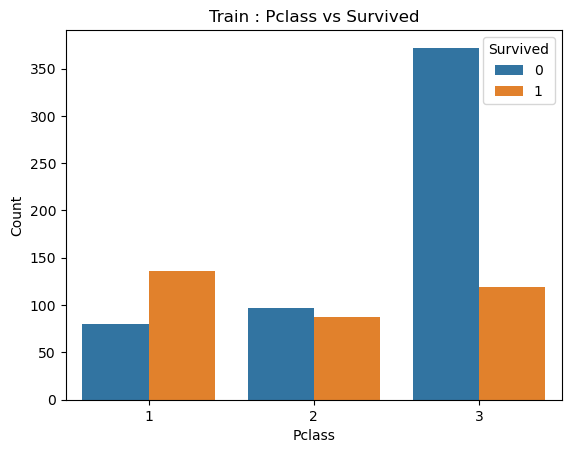

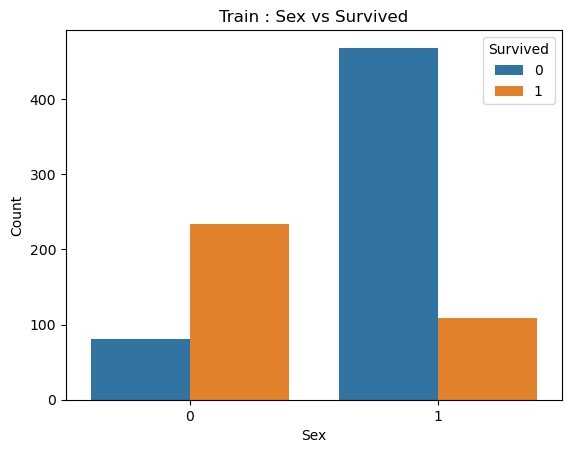

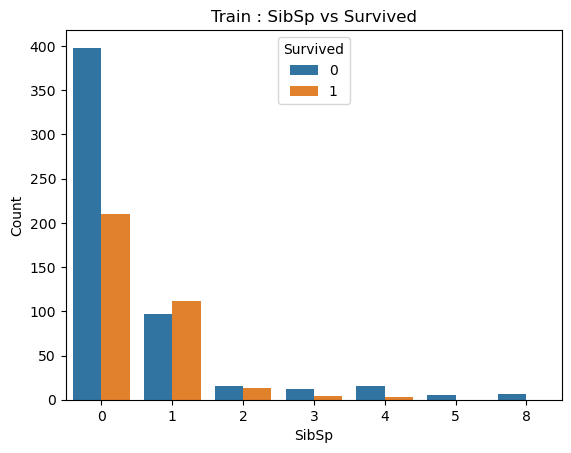

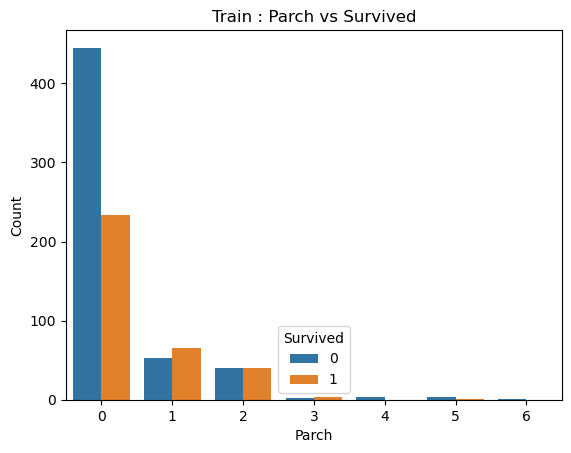

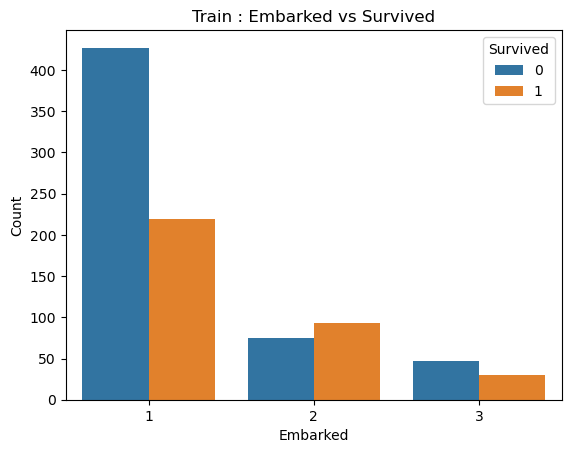

In [21]:
for cols in categorical_columns:
    sns.countplot(x=cols, hue='Survived', data=train)
    plt.title(f'Train : {cols} vs Survived')
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')
    plt.show()

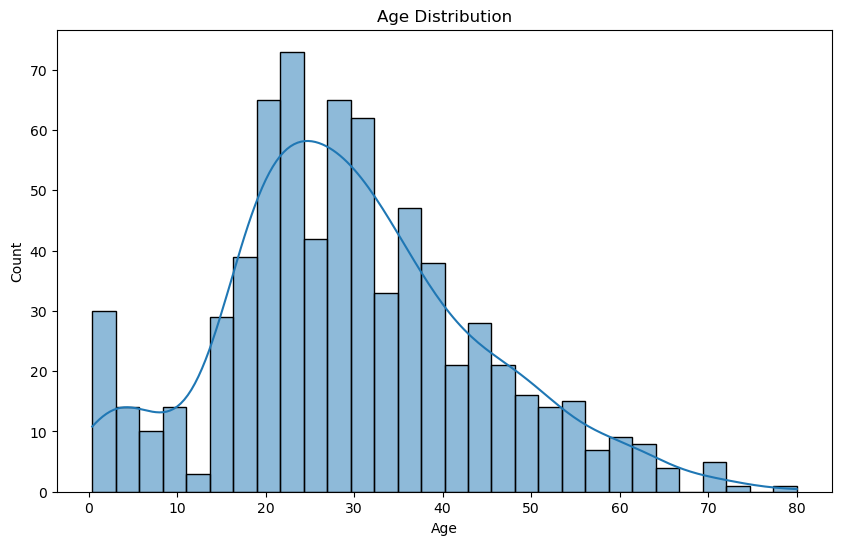

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

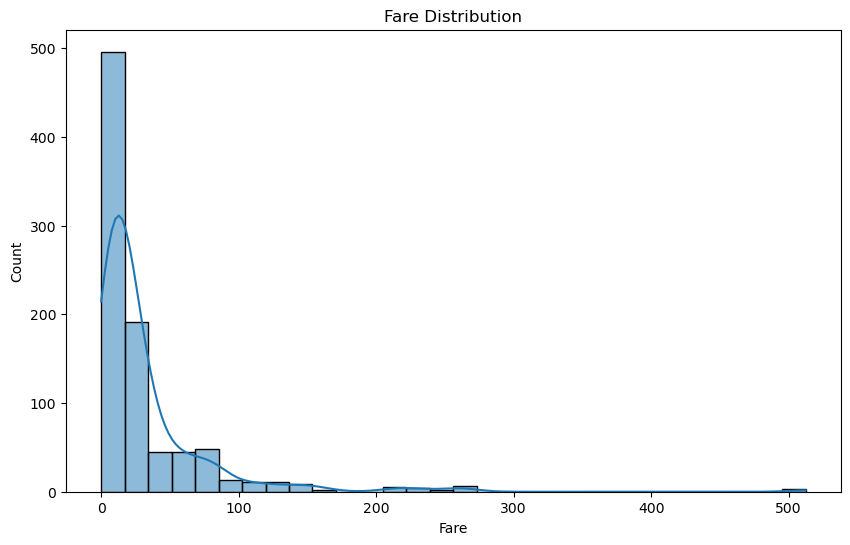

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

Correlation matrix (relations between features)

In [24]:
df_for_corr = train.drop(['Name'],axis=1)
corr_mat = df_for_corr.corr()

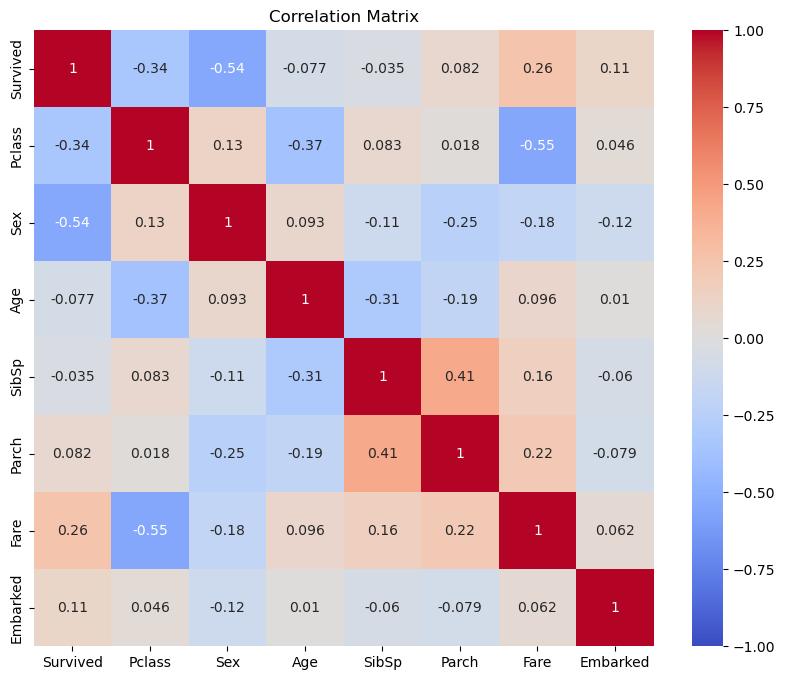

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Age Feature Engineering

In [26]:
train['Initials'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [27]:
test['Initials'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
title_mapping = {
    'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss', 'Lady': 'Mrs',
    'Countess': 'Mrs', 'Dr': 'Mr', 'Major': 'Mr', 'Capt': 'Mr',
    'Sir': 'Mr', 'Don': 'Mr', 'Jonkheer': 'Other', 'Col': 'Other', 'Rev': 'Other' 
}
train['Initials'] = train['Initials'].replace(title_mapping)

In [29]:
test_title_mapping = {
    'Ms': 'Miss', 'Dr': 'Mr', 'Col': 'Mr', 'Rev': 'Other', 'Dona': 'Other'
}
test['Initials'] = test['Initials'].replace(test_title_mapping)

In [30]:
train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [31]:
test.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [32]:
train.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [33]:
test.groupby('Initials')['Age'].mean()

Initials
Master     7.406471
Miss      21.774844
Mr        32.306452
Mrs       38.903226
Other     36.666667
Name: Age, dtype: float64

In [34]:
age_fill_values = {
    'Mr': 33,
    'Mrs': 36,
    'Master': 5,
    'Miss': 22,
    'Other': 46
}

train['Age'] = train.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [35]:
test_age_fill_values = {
    'Mr': 33,
    'Mrs': 39,
    'Master': 7,
    'Miss': 22,
    'Other': 47
}

test['Age'] = test.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [36]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initials    0
dtype: int64

In [37]:
print(train.Age.describe())

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


In [38]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80,float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8,9]

train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

train['Age_Group'] = train['Age_Group'].astype('Int64')

In [39]:
test['Age_Group'] = pd.cut(test['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

test['Age_Group'] = test['Age_Group'].astype('Int64')

In [40]:
train.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Initials     0
Age_Group    0
dtype: int64

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Initials       0
Age_Group      0
dtype: int64

In [42]:
test['Fare'] = test.Fare.fillna(test.Fare.mean())

In [43]:
train["Total_family_size"] = train.SibSp + train.Parch

In [44]:
test["Total_family_size"] = train.SibSp + train.Parch

In [45]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1,Mr,3,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2,Mrs,4,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1,Miss,3,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,Mrs,4,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1,Mr,4,0


In [46]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,Mr,4,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,Mrs,5,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,Mr,7,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,Mr,3,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,Mrs,3,0


In [47]:
train.Total_family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [48]:
test.Total_family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10], dtype=int64)

In [49]:
train.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [50]:
train['Initials'] = train.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [51]:
test['Initials'] = test.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [52]:
df = train.drop('Name',axis=1)

In [53]:
df_test = test.drop(['PassengerId','Name'],axis=1)

In [54]:
# Dataframe ready for testing
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,1,22.0,1,0,7.2500,1,1,3,1
1,1,1,0,38.0,1,0,71.2833,2,4,4,1
2,1,3,0,26.0,0,0,7.9250,1,3,3,0
3,1,1,0,35.0,1,0,53.1000,1,4,4,1
4,0,3,1,35.0,0,0,8.0500,1,1,4,0


# Training and Testing

In [55]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [56]:
# Data standardization
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [57]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Linear regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, lr_pred):.4f}')

Accuracy: 0.7989


In [59]:
# Define the Parameter Grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'], # Specifies the norm used in the penalization
    'C': np.logspace(-4, 4, 20), # Inverse of regularization strength: smaller values specify stronger regularization (C= 1/λ)
    'solver': ['lbfgs', 'liblinear', 'saga'] #  Specifies the algorithm to use in the optimization problem
}

#L1 sums the absolute values of the coefficients: λ∑|w i|)
#L2 sums the squares of the coefficients: λ∑(w i)²)
#elasticnet combines L1 and L2 norms (λ∑|w i| + λ∑(w i)²)
# lbfgs: Supports L2 regularization
# liblinear: Supports L1 and L2 regularization
# saga: Supports L1, L2, and elasticnet regularization. Suitable for large datasets

In [60]:
# Create the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # 3-fold cross-validation
                           verbose=0,  # Set to 0 for no verbosity
                           n_jobs=-1)  # Use all available cores

# estimator: The model to be tuned with max iterations=10000 (to allow sufficient iterations for convergence).
# param_grid: The parameter grid defined earlier
# scoring: The performance metric to evaluate the model is set to 'accuracy'
# cv: Number of cross-validation folds is set to 3
# verbose: means no messages are printed in the output
# n_jobs: Number of jobs to run in parallel; -1 uses all available processors

In [61]:
# Fit the grid search to the data (performs the grid search by training the logistic regression model on 
#the training data (X_train, y_train) using different combinations of hyperparameters specified in the 
#param_grid. It evaluates each combination using 3-fold cross-validation and selects the combination with 
#the best accuracy.)
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [62]:
# Get the best parameters
best_params_lr = grid_search_lr.best_params_
print(f'Best Parameters: {best_params_lr}')

# Train the model with the best parameters
best_model_lr = grid_search_lr.best_estimator_

Best Parameters: {'C': 0.615848211066026, 'penalty': 'l2', 'solver': 'saga'}


In [63]:
# Evaluate the model
y_pred_lr = best_model_lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')

Logistic Regression Model Accuracy: 0.7933


Support Vector Machine

In [64]:
# The SVM algorithm identifies the optimal hyperplane that separates the data points into classes 
#while maximizing the margin

# Initialize the SVM model
svm_model = SVC(kernel='linear') # kernel='linear': Specifies that a linear kernel will be used to separate the data points
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print(f'SVM Accuracy: {accuracy_score(y_test, svm_pred):.4f}')

SVM Accuracy: 0.7765


In [65]:
# This grid will be used in a grid search to systematically work through multiple combinations of 
#hyperparameter values, cross-validate each combination, and determine the best combination for 
#the SVM model
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01,],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# 'gamma': This parameter is specific to some kernel functions like Radial Basis Function (RBF) and 
#Polynomial kernels,it defines how far the influence of a single training example reaches 
#(High values of gamma: Indicates that a single training example has a close reach, resulting in more 
#complex models, and oppositly for low values of gamma)

In [66]:
# Create the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # 3-fold cross-validation
                           verbose=1,  # Set to 0 for no verbosity
                           n_jobs=-1)  # Use all available cores

# Fit the grid search to the data
grid_search_svm.fit(X_train, y_train)

# Get the best parameters
best_params_svm = grid_search_svm.best_params_
print(f'Best Parameters: {best_params_svm}')

# Train the model with the best parameters
best_model_svm = grid_search_svm.best_estimator_

# Evaluate the model
y_pred_svm = best_model_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy:.4f}')

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Model Accuracy: 0.8101


DecisionTreeClassifier

In [67]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')

Decision Tree Accuracy: 0.8045


RandomForestClassifier

In [68]:
# Random Forest classifier is an ensemble learning method that combines multiple decision trees to improve 
#the overall performance, robustness, and generalization ability of the model, it is used for both 
#classification and regression tasks
rf_model = RandomForestClassifier(n_estimators=100) # A Random Forest classifier with 100 trees is created
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')

Random Forest Accuracy: 0.8380


In [69]:
rf_param_grid = {
    'n_estimators': [100, 300, 500], # specifies the number of trees 
    'max_depth': [None, 10, 30, 50], # specifies the maximum depth of each tree in the forest
    'min_samples_split': [2, 5, 10], # specifies the minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 5] # specifies the minimum number of samples required to be at a leaf node.
}

In [70]:
# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=rf_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for RandomForestClassifier: {best_params_rf}')

# Train the model with the best parameters
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
y_pred_rf = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'RandomForestClassifier Accuracy: {accuracy:.4f}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
RandomForestClassifier Accuracy: 0.8436


NEURAL NETWORKS

In [71]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate model
nn_pred = nn_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)
print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_pred):.4f}')

Epoch 1/10
18/18 [==============================] - 1s 11ms/step - loss: 0.6304 - accuracy: 0.6274 - val_loss: 0.5021 - val_accuracy: 0.7832
Epoch 2/10
18/18 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7926 - val_loss: 0.4401 - val_accuracy: 0.8462
Epoch 3/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4759 - accuracy: 0.8014 - val_loss: 0.4101 - val_accuracy: 0.8392
Epoch 4/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.8049 - val_loss: 0.4026 - val_accuracy: 0.8392
Epoch 5/10
18/18 [==============================] - 0s 2ms/step - loss: 0.4537 - accuracy: 0.8067 - val_loss: 0.3993 - val_accuracy: 0.8322
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4490 - accuracy: 0.8120 - val_loss: 0.3949 - val_accuracy: 0.8392
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 0.4453 - accuracy: 0.8137 - val_loss: 0.3965 - val_accuracy: 0.8322
Epoch 8/10
18/18 [=

In [72]:
lr

LogisticRegression(max_iter=1000)

In [73]:
best_model_svm

SVC(C=100, gamma=0.01)

In [74]:
best_model_rf

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)

In [75]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


Creating testing data

In [76]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,34.5,0,0,7.8292,3,1,4,1
1,3,0,47.0,1,0,7.0000,1,4,5,1
2,2,1,62.0,0,0,9.6875,3,1,7,0
3,3,1,27.0,0,0,8.6625,1,1,3,1
4,3,0,22.0,1,1,12.2875,1,4,3,0
...,...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,8.0500,1,1,4,0
414,1,0,39.0,0,0,108.9000,2,5,4,0
415,3,1,38.5,0,0,7.2500,1,1,4,0
416,3,1,33.0,0,0,8.0500,1,1,4,2


In [77]:
scaler = StandardScaler()
df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [78]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,0.326880,-0.499470,-0.400248,-0.498407,3,1,0.364427,0.016932
1,3,0,1.286672,0.616992,-0.400248,-0.513274,1,4,1.133771,0.016932
2,2,1,2.438422,-0.499470,-0.400248,-0.465088,3,1,2.672461,-0.572859
3,3,1,-0.248995,-0.499470,-0.400248,-0.483466,1,1,-0.404918,0.016932
4,3,0,-0.632912,0.616992,0.619896,-0.418471,1,4,-0.404918,-0.572859
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,-0.572859
414,1,0,0.672405,-0.499470,-0.400248,1.313753,2,5,0.364427,-0.572859
415,3,1,0.634014,-0.499470,-0.400248,-0.508792,1,1,0.364427,-0.572859
416,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,0.606723


In [79]:
pred_lr = lr.predict(df_test)

In [80]:
pred_svm = best_model_svm.predict(df_test)

In [81]:
pred_rf = best_model_rf.predict(df_test)

In [82]:
pred_nn = nn_model.predict(df_test)
pred_nn = (pred_nn > 0.5).astype(int)

14/14 [==============================] - 0s 1ms/step


In [83]:
predictions= {'lr':pred_lr,'svm':pred_svm,'rf':pred_rf,'nn':pred_nn}

In [84]:
for key,value in predictions.items():
    result = pd.DataFrame()
    result['PassengerId'] = test.PassengerId 
    result['Survived'] = value
    result.to_csv(f"submission_{key}.csv",index=False)
    print (result)
    result = 0

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417    